In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
import sys
import warnings
import datetime
import tkinter as tk
from tkinter import messagebox
warnings.filterwarnings("ignore")

# Load the data
file_path = 'D:\\FRAUD\\bank_transactions_data_2.csv'
df = pd.read_csv(file_path,low_memory=False)

# Convert TransactionDate to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Sort by TransactionDate
df = df.sort_values(by='TransactionDate')

dfa=df.drop_duplicates()

In [2]:
# Prepare the data
X = df[['TransactionAmount']]

# Number of Isolation Forest models to train
n_models = 5
isolation_forest_models = []
predictions = np.zeros((X.shape[0], n_models))

# Train multiple Isolation Forest models on different subsets
for i in range(n_models):
    X_train, _, _, _ = train_test_split(X, X, test_size=0.5, random_state=i)
    model = IsolationForest(contamination=0.05, random_state=i)
    model.fit(X_train)
    isolation_forest_models.append(model)
    predictions[:, i] = model.decision_function(X)

# Average the anomaly scores
average_scores = predictions.mean(axis=1)
# Convert scores to binary anomaly predictions
threshold = np.percentile(average_scores, 5)  # Assuming 5% anomaly rate
df['Aggregated_Anomaly'] = average_scores < threshold


Random Forest Model Accuracy: 0.96



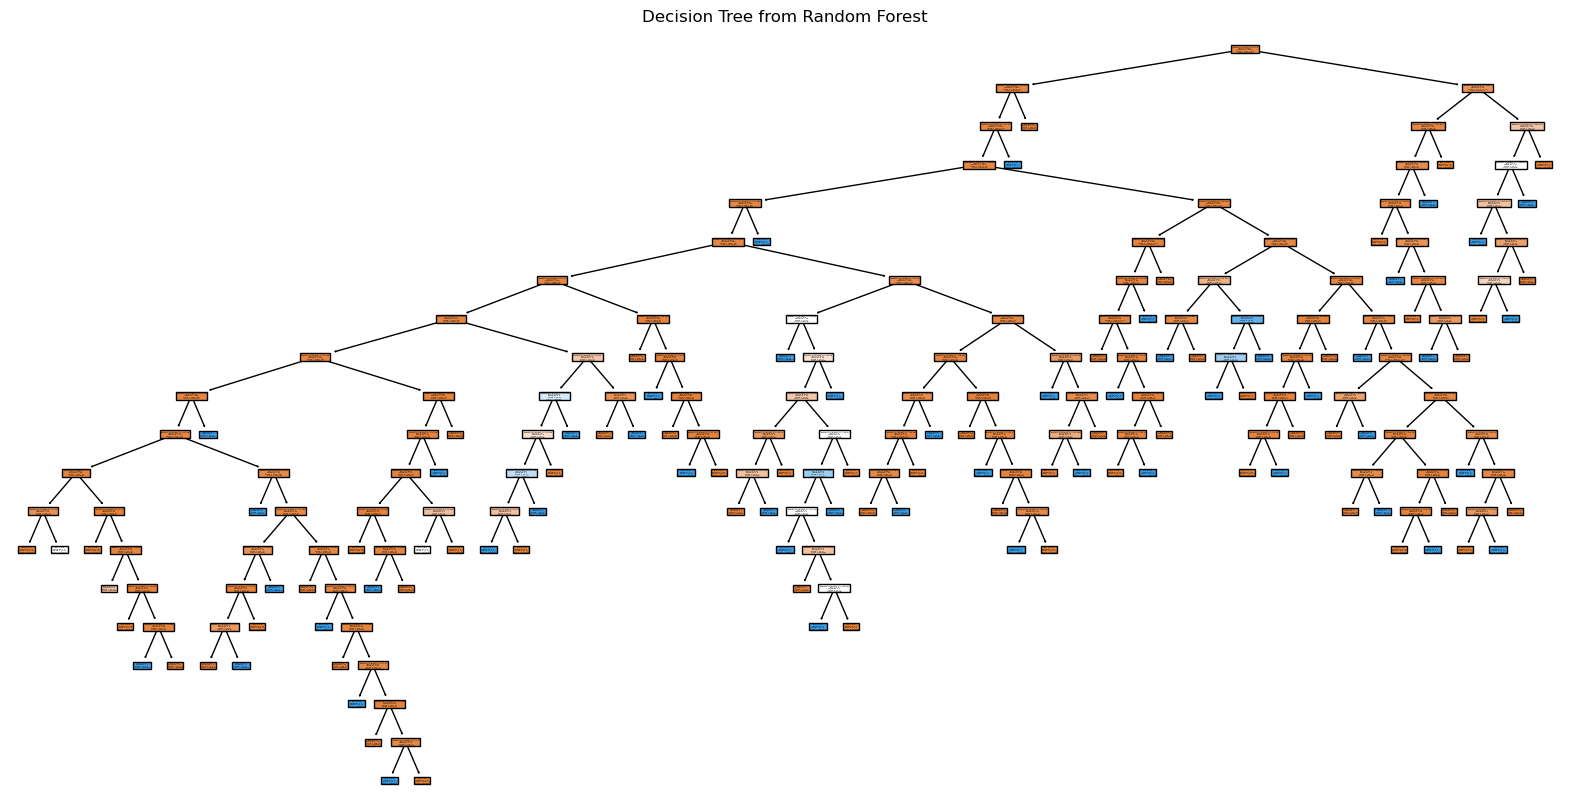

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Create a dummy 'True_Anomaly' column for demonstration
np.random.seed(0)  # For reproducibility
df['True_Anomaly'] = np.random.choice([True, False], size=len(df), p=[0.05, 0.95])

# Prepare the features and labels for Random Forest
features = df[['TransactionAmount']]
features['Aggregated_Anomaly'] = df['Aggregated_Anomaly']
labels = df['True_Anomaly']
X = df[['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']]
y = df['True_Anomaly']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict anomalies
df['RandomForest_Anomaly'] = rf_model.predict(features)

RFanomalies = df[df['RandomForest_Anomaly'] == 1]
#print("Anomalies detected by Random Forest:")
#print(anomalies)
RFanomalies.to_excel('D:\\FRAUD\\RandomForestAnomalies.xlsx', index=False)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels, df['RandomForest_Anomaly'])
print(f'Random Forest Model Accuracy: {accuracy:.2f}')
print ()

# Visualize one of the decision trees from the Random Forest
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=['Normal', 'Anomaly'], filled=True)
plt.title('Decision Tree from Random Forest')
plt.show()